# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

square of 2-norm of w is 0.02869589711175433
Lambda is 1000.0
E_train is 0.015, E_test is 0.0622802611752888


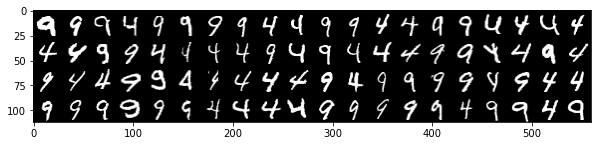

In [4]:
show_digit(X)
# Do feature normalization here
# begin answer

# use Z-score Normalization, i.e., Standardization
# standard deviation
std_X = np.std(X)
# average
avg_X = np.average(X)
# standardization
X = (X - avg_X) / std_X

# # use mean normalization instead
# avg_X = np.average(X)
# min_X = np.min(X)
# max_X = np.max(X)
# X = (X - avg_X) / (max_X - min_X)
# end answer

# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = lmbdas[0]
E_val_min = float('inf')

from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=1)
        w = ridge(X_, y_, lmbdas[i])
        converted_X = np.vstack((np.ones((1, X.shape[1])), X))
        # sample j, a column vector
        sample_j = converted_X[:, [j]]
        label_j = y[0, j]
        predict_j = np.sign(np.dot(w.T, sample_j))
        E_val += (label_j - predict_j) ** 2

    E_val /= X.shape[1]
    # Update lmbda according validation error
    # begin answer
    if(E_val < E_val_min):
        lmbda = lmbdas[i]
        E_val_min = E_val
    
    # print("current optimal lambda:{}".format(lmbda))
    # end answer
    
# Compute training error
nTrain = X.shape[1]

w_g = ridge(X, y, lmbda)
y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
E_train = (y != y_train_predict.T).sum() / nTrain

# Do feature normalization to X_test, y_test
# standard deviation
std_X_test = np.std(X_test)
# average
avg_X_test = np.average(X_test)
# standardization
X_test = (X_test - avg_X_test) / std_X_test
# Compute test error
nTest = X_test.shape[1]

y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1,            X_test.shape[1])), X_test)))).T
E_test = (y_test != y_test_predict.T).sum() / nTest

print("square of 2-norm of w is {}".format(np.linalg.norm(w_g)**2))
print("Lambda is {}".format(lmbda))
print('E_train is {}, E_test is {}'.format(E_train, E_test))

Without regularization, square of 2-norm of w is 1.2961070713057155
Without regularization, E_train is 0.0, E_test is 0.10547463586137619


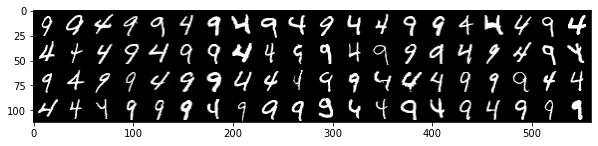

In [5]:
show_digit(X)
# Do feature normalization here
# begin answer

# use Z-score Normalization, i.e., Standardization
# standard deviation
std_X = np.std(X)
# average
avg_X = np.average(X)
# standardization
X = (X - avg_X) / std_X

# # use mean normalization instead
# avg_X = np.average(X)
# min_X = np.min(X)
# max_X = np.max(X)
# X = (X - avg_X) / (max_X - min_X)
# end answer

from ridge import ridge
    
# Compute training error
nTrain = X.shape[1]

w_g = ridge(X, y, 0)
y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
E_train = (y != y_train_predict.T).sum() / nTrain

# Do feature normalization to X_test, y_test
# standard deviation
std_X_test = np.std(X_test)
# average
avg_X_test = np.average(X_test)
# standardization
X_test = (X_test - avg_X_test) / std_X_test
# Compute test error
nTest = X_test.shape[1]

y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T
E_test = (y_test != y_test_predict.T).sum() / nTest

print("Without regularization, square of 2-norm of w is {}".format(np.linalg.norm(w_g)**2))
print('Without regularization, E_train is {}, E_test is {}'.format(E_train, E_test))

### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

Lambda is 0.1
E_train is 0.0, E_test is 0.053239578101456554


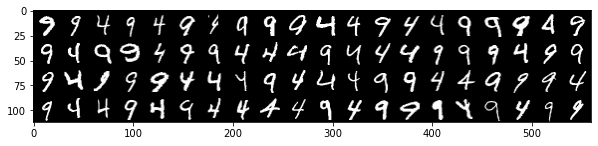

In [9]:
show_digit(X)
# Do feature normalization here
# begin answer

# use Z-score Normalization, i.e., Standardization
# standard deviation
std_X = np.std(X)
# average
avg_X = np.average(X)
# standardization
X = (X - avg_X) / std_X

# # use mean normalization instead
# avg_X = np.average(X)
# min_X = np.min(X)
# max_X = np.max(X)
# X = (X - avg_X) / (max_X - min_X)
# end answer

# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = lmbdas[0]
E_val_min = float('inf')

from logistic_r import logistic_r

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=1)
        w = logistic_r(X_, y_, lmbdas[i])
        converted_X = np.vstack((np.ones((1, X.shape[1])), X))
        # sample j, a column vector
        sample_j = converted_X[:, [j]]
        label_j = y[0, j]
        predict_j = np.sign(np.dot(w.T, sample_j))
        E_val += (label_j - predict_j) ** 2

    E_val /= X.shape[1]
    # Update lmbda according validation error
    # begin answer
    if(E_val < E_val_min):
        lmbda = lmbdas[i]
        E_val_min = E_val
    
    # print("current optimal lambda:{}".format(lmbda))
    # end answer
    
# Compute training error
nTrain = X.shape[1]

w_g = logistic_r(X, y, lmbda)
y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
E_train = (y != y_train_predict.T).sum() / nTrain

# Do feature normalization to X_test, y_test
# standard deviation
std_X_test = np.std(X_test)
# average
avg_X_test = np.average(X_test)
# standardization
X_test = (X_test - avg_X_test) / std_X_test
# Compute test error
nTest = X_test.shape[1]

y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T
E_test = (y_test != y_test_predict.T).sum() / nTest

print("Lambda is {}".format(lmbda))
print('E_train is {}, E_test is {}'.format(E_train, E_test))

Without regularization, E_train is 0.0, E_test is 0.06378704168759418


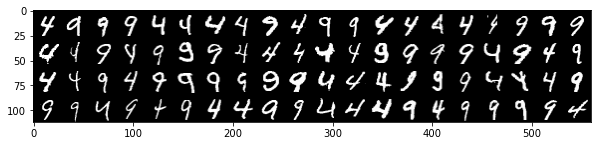

In [10]:
show_digit(X)
# Do feature normalization here
# begin answer

# use Z-score Normalization, i.e., Standardization
# standard deviation
std_X = np.std(X)
# average
avg_X = np.average(X)
# standardization
X = (X - avg_X) / std_X

# # use mean normalization instead
# avg_X = np.average(X)
# min_X = np.min(X)
# max_X = np.max(X)
# X = (X - avg_X) / (max_X - min_X)
# end answer

# Compute training error
nTrain = X.shape[1]

w_g = logistic_r(X, y, 0)
y_train_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
E_train = (y != y_train_predict.T).sum() / nTrain

# Do feature normalization to X_test, y_test
# standard deviation
std_X_test = np.std(X_test)
# average
avg_X_test = np.average(X_test)
# standardization
X_test = (X_test - avg_X_test) / std_X_test
# Compute test error
nTest = X_test.shape[1]

y_test_predict = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T
E_test = (y_test != y_test_predict.T).sum() / nTest

print('Without regularization, E_train is {}, E_test is {}'.format(E_train, E_test))